In [9]:
import glob
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

In [10]:
path_to_library = '/home/paula/Masterarbeit/FragmentLibrary/'

# list of folders for each subpocket
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2', 'X']
folders = [path_to_library+subpocket for subpocket in subpockets]

In [11]:
# read data

data = pd.DataFrame()

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = pd.DataFrame()
    suppl = Chem.SDMolSupplier(file, removeHs=False)
        
    fragments = []
    num_atoms = []
    num_hd = []
    num_ha = []
    logp = []
    smiles = []

    for frag in suppl:
        
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        s = Chem.MolToSmiles(fixed_frag)
        # remove duplicates based on smiles
        if s in smiles:
            continue
        smiles.append(s)
        fragments.append(frag)
        num_atoms.append(frag.GetNumHeavyAtoms())
        num_hd.append(Lipinski.NumHDonors(frag))
        num_ha.append(Lipinski.NumHAcceptors(frag))
        logp.append(Descriptors.MolLogP(frag))
    
    df['Mol'] = fragments
    df['subpocket'] = subpocket
    df['# heavy atoms'] = num_atoms
    df['# HB donors'] = num_hd
    df['# HB acceptors'] = num_ha
    df['logP'] = logp
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

(3087, 6)

In [12]:
my_pal = {"AP": "purple", "FP": "forestgreen", "SE":"c", "GA":"tab:orange", "B1":"tab:blue", "B2":"darkslateblue", "X":"grey"}

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

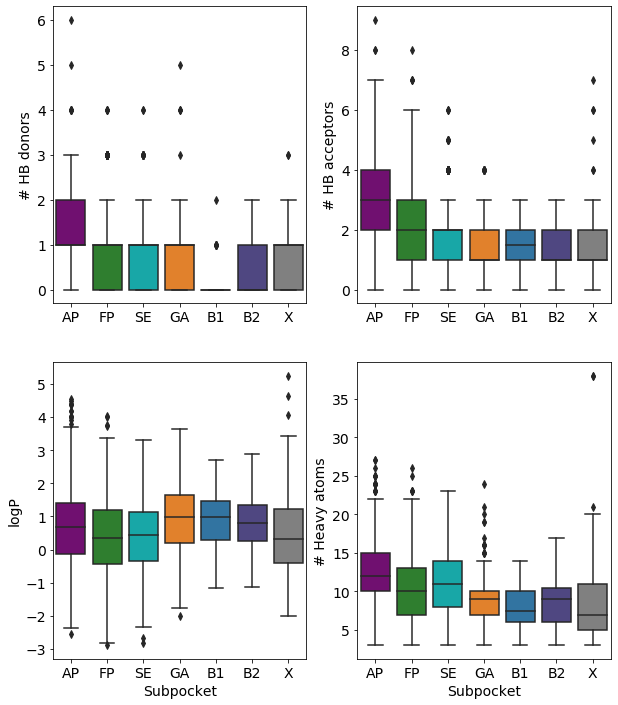

In [13]:
plt.figure(figsize=(10,12))

plt.subplot(221)
sns.boxplot(x='subpocket', y='# HB donors', data=data, palette=my_pal)
plt.ylabel('# HB donors', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(222)
sns.boxplot(x='subpocket', y='# HB acceptors', data=data, palette=my_pal)
plt.ylabel('# HB acceptors', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(223)
sns.boxplot(x='subpocket', y='logP', data=data, palette=my_pal)
plt.ylabel('logP', fontsize=14)
plt.xlabel('Subpocket', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(224)
sns.boxplot(x='subpocket', y='# heavy atoms', data=data, palette=my_pal)
plt.ylabel('# Heavy atoms', fontsize=14)
plt.xlabel('Subpocket', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)